In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'indonesian-fact-and-hoax-political-news:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3033808%2F5312830%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240416%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240416T140556Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da1a70625334f43a0b9c125c63e0e8a5b7ed7da791576173d1d010316b57e3ec8140e5e7f2300ab19006a73639e21204c15d4511ecb1590219ec1c1759094b7170766020028d49acd6fef93ed648b0d02caa6bbdb00e724bee97c16a9f011fe7ca897b5976e47348922072bebcf713264e596905f7c6212e15eb70290d9e8908b52443d1ae05ef39998d1d2a78bd144970f32c5b4cf6af4f2969601e6c37ad4e7c7f52ad6048e00e270a9ba827977a8df946f405ef060a127ae499171f1a31404376938984fc6ee5f54ca66464e79c9ce59e0de26df403a19a6859d762e800d32933f6df4526aa349d7c61b28ee22e677f1aeb3e0b57153d4d2769c5ecb419aee'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 71610430 bytes downloaded
Downloaded and uncompressed: indonesian-fact-and-hoax-political-news
Data source import complete.


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Import RAW Dataset

In [3]:
TURNBACKHOAX_XLSX = '/kaggle/input/indonesian-fact-and-hoax-political-news/RAW/dataset_turnbackhoax_10k.xlsx'

In [4]:
df = pd.read_excel(TURNBACKHOAX_XLSX)

df

,Title,Timestamp,FullText,Tags,Author,Url
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...
...,...,...,...,...,...,...
10379,(HOAX) Foto Raja Salman Mengangkat Tandu Jenaz...,2015-09-15 00:00:00,Sumber : media sosial\nNarasi : Raja Salman da...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/15/hoax-foto-r...
10380,"(HOAX) Jokowi dituduh bodoh, salah cara dalam ...",2015-09-12 00:00:00,"Sumber : media sosial\nNarasi : hehe, selalu b...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/12/jokowi-ditu...
10381,(FITNAH) Jokowi dituduh memasukkan ribuan tena...,2015-09-08 00:00:00,Sumber : Media Sosial\nNarasi : Pak Jokowi itu...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/jokowi-ditu...
10382,(HOAX) Mata Uang Rupiah Terpuruk,2015-09-08 00:00:00,"Sumber : media sosial\nNarasi : Hari ini, Rabu...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/mata-uang-r...


# Check NULL

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      10383 non-null  object
 1   Timestamp  10384 non-null  object
 2   FullText   10382 non-null  object
 3   Tags       10384 non-null  object
 4   Author     10384 non-null  object
 5   Url        10384 non-null  object
dtypes: object(6)
memory usage: 486.9+ KB


In [6]:
# there are null values on FullText, drop it

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10381 entries, 0 to 10383
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      10381 non-null  object
 1   Timestamp  10381 non-null  object
 2   FullText   10381 non-null  object
 3   Tags       10381 non-null  object
 4   Author     10381 non-null  object
 5   Url        10381 non-null  object
dtypes: object(6)
memory usage: 567.7+ KB


# Filter political content

In [7]:
politik = ['anies', 'anies baswedan', 'megawati', 'jokowi', 'joko widodo', 'pdi-p', 'pdip', 'sby', 'ganjar'
           , 'ganjar pranowo', 'ridwan kamil', 'pks', 'prabowo', 'prabowo subianto', 'gerindra', 'ahok',
           'rk', 'golkar', 'pemilu', 'demokrat', 'gibran', 'sandiaga', 'puan', 'rizieg', '2024']


In [8]:
import re

a = 'Anies' in df['Title'][0]
print(df['Title'][0])
print(a)

[SALAH] Anies Baswedan Dekat Dengan Aliran Krsiten Sesat Alpha Omega di Papua
True


In [9]:
for index, row in df.iterrows():
    res = any(x in str(row['Title']).lower() for x in politik)
    if res:
        df.at[index,'politik'] = 1
    else:
        df.at[index,'politik'] = 0

df['politik'] = df['politik'].astype(int)
df

<ipython-input-9-b2e0cdddf70d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index,'politik'] = 1
<ipython-input-9-b2e0cdddf70d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['politik'] = df['politik'].astype(int)


,Title,Timestamp,FullText,Tags,Author,Url,politik
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,1
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...,0
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...,1
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...,0
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...,1
...,...,...,...,...,...,...,...
10379,(HOAX) Foto Raja Salman Mengangkat Tandu Jenaz...,2015-09-15 00:00:00,Sumber : media sosial\nNarasi : Raja Salman da...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/15/hoax-foto-r...,0
10380,"(HOAX) Jokowi dituduh bodoh, salah cara dalam ...",2015-09-12 00:00:00,"Sumber : media sosial\nNarasi : hehe, selalu b...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/12/jokowi-ditu...,1
10381,(FITNAH) Jokowi dituduh memasukkan ribuan tena...,2015-09-08 00:00:00,Sumber : Media Sosial\nNarasi : Pak Jokowi itu...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/jokowi-ditu...,1
10382,(HOAX) Mata Uang Rupiah Terpuruk,2015-09-08 00:00:00,"Sumber : media sosial\nNarasi : Hari ini, Rabu...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/mata-uang-r...,0


In [10]:
df['politik'].value_counts()

politik
0    8130
1    2251
Name: count, dtype: int64

# Retrieve Narasi from News

In [11]:
def retrieve_narasi_from_text(text):
    narasi = ''
    narasi_start_splitters = ['NARASI:', 'Narasi(Diterjemahkan ke Bahasa Indonesia)', '[NARASI]:', 'Narasi :', '[NARASI]', 'Narasi:', 'NARASI :']
    for s in narasi_start_splitters:
        if s in text:
            narasi = text.split(s)[1]
            break

    narasi_ended = ''
    narasi_end_splitter = ['PENJELASAN:', '[PENJELASAN]:', 'Penjelasan :', '[PENJELASAN]', 'PENJELASAN', 'PENJELASAN :']
    for s in narasi_end_splitter:
        if s in text:
            narasi_ended = narasi.split(s)[0]
            break

    if len(narasi_ended) > 0:
        narasi = narasi_ended

    lanjutan_narasi = ''
    lanjutan_narasi_splitters = ['(Lanjutan Narasi)']
    for s in lanjutan_narasi_splitters:
        if s in text:
            lanjutan_narasi = text.split(s)[1]

    narasi_lengkap = narasi + ' ' + lanjutan_narasi
    return narasi_lengkap

In [12]:
# df_with_index = df.reset_index()
# news_with_narasi = []

# for _, row in tqdm(df_with_index[['index', 'FullText']].iterrows(), total=df_with_index.shape[0]):
#     index = row['index']
#     text = row['FullText']
#     if not str(text) == 'nan':
#         narasi = retrieve_narasi_from_text(text)
#     else:
#         narasi = ''
#     news_with_narasi.append([index, text, narasi])

df['Narasi'] = df['FullText'].map(lambda x: retrieve_narasi_from_text(x))
df.head()

<ipython-input-12-3581d083fc28>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Narasi'] = df['FullText'].map(lambda x: retrieve_narasi_from_text(x))


,Title,Timestamp,FullText,Tags,Author,Url,politik,Narasi
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,1,\n“BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU...
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...,0,\n“ini bener gasih?? Ya Allah gimna keadaan pa...
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...,1,\n“Nenek lampir pemimpin partai banteng bercul...
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...,0,\n“gerombolan kulup banyak menyusup ke ormas2 ...
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...,1,


# Check Narasi

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10381 entries, 0 to 10383
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      10381 non-null  object
 1   Timestamp  10381 non-null  object
 2   FullText   10381 non-null  object
 3   Tags       10381 non-null  object
 4   Author     10381 non-null  object
 5   Url        10381 non-null  object
 6   politik    10381 non-null  int64 
 7   Narasi     10381 non-null  object
dtypes: int64(1), object(7)
memory usage: 988.0+ KB


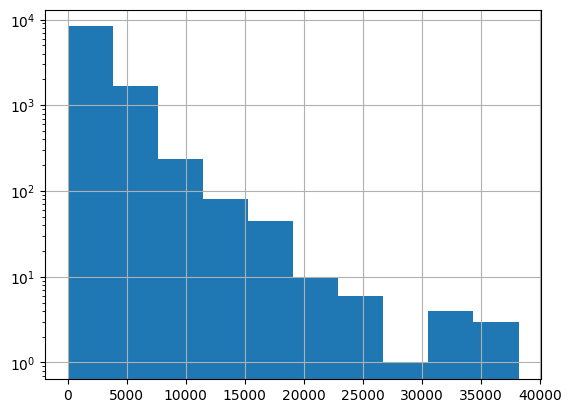

In [14]:
df['FullText'].str.len().hist().set_yscale('log')

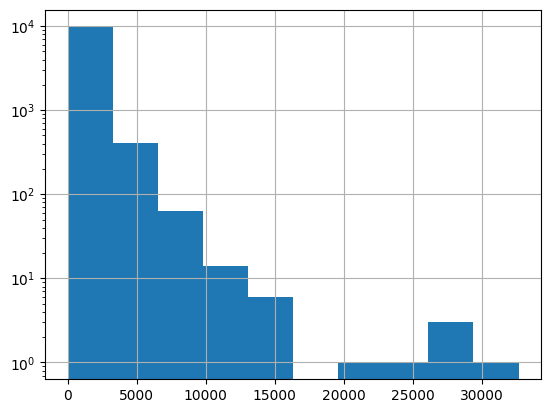

In [15]:
df['Narasi'].str.len().hist().set_yscale('log')

# Cleanup Narasi

In [16]:
def clean_narasi(text):
    # remove multiple used of '='
    text = text.replace('=', ' ')

    # remove '\n', '\r', and '\t'
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\t', ' ')

    # remove non ascii
    text = ''.join([i if ord(i) < 128 else ' ' for i in text])

    # remove multiple space
    text = re.sub(' +', ' ', text)

    # remove whitespace in start and end
    text = text.strip()
    return text
df['Clean Narasi'] = df['Narasi'].map(lambda x: clean_narasi(x))
df.head(5)

<ipython-input-16-3a4cc74ba390>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean Narasi'] = df['Narasi'].map(lambda x: clean_narasi(x))


,Title,Timestamp,FullText,Tags,Author,Url,politik,Narasi,Clean Narasi
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,1,\n“BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU...,BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU AP...
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...,0,\n“ini bener gasih?? Ya Allah gimna keadaan pa...,ini bener gasih?? Ya Allah gimna keadaan pa ha...
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...,1,\n“Nenek lampir pemimpin partai banteng bercul...,Nenek lampir pemimpin partai banteng bercula s...
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...,0,\n“gerombolan kulup banyak menyusup ke ormas2 ...,gerombolan kulup banyak menyusup ke ormas2 isl...
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...,1,,


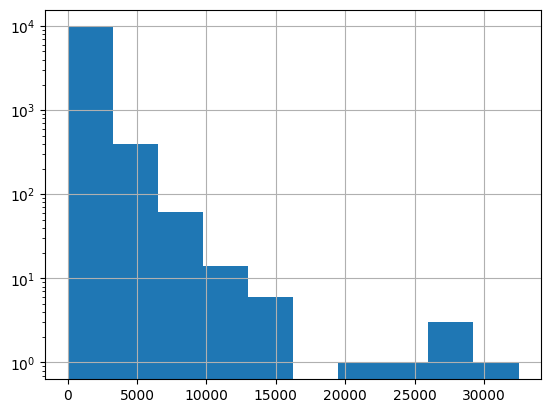

In [17]:
df['Clean Narasi'].str.len().hist().set_yscale('log')

## Maybe, there is too short narasi, just check it

In [18]:
df_short_narasi = df[df['Clean Narasi'].str.len() <= 10]
df_good_narasi = df[df['Clean Narasi'].str.len() > 10]
df_good_narasi.shape, df_short_narasi.shape

((6489, 9), (3892, 9))

In [19]:
print(df_good_narasi.sample(1, random_state=1)[['Clean Narasi']].values[0])

['Mix and drink as hot tea every afternoon, the action of the lemon with hotter baking soda immediately kills the virus completely eliminates it from the body. These two components alkalize the immune system, since when night falls the system becomes acidic and defenses lower. That is why the People of Israel is relaxed about this virus. Everyone in Israel drinks a cup of hot water with lemon and a little baking soda at night, as this is proven to kill the virus. I share it will all my family and friends so that none of us get the virus. I leave it to your criteria. Please pass this immediately (terjemahan)Campur dan minum sebagai teh panas setiap sore, reaksi lemon dengan baking soda panas membunuh virus dengan segera menghilangkan sepenuhnya dari tubuh. Kedua komponen ini membuat sistem kekebalan menjadi alkali, karena ketika malam tiba, sistem menjadi asam dan kekebalan menjadi lebih rendah. Itulah sebabnya Rakyat Israel santai tentang virus ini. Semua orang di Israel minum secangki

# Add hoax label

In [20]:
df['hoax'] = 1

<ipython-input-20-3ca2713b03ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hoax'] = 1


In [21]:
df.head(3)

,Title,Timestamp,FullText,Tags,Author,Url,politik,Narasi,Clean Narasi,hoax
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,1,\n“BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU...,BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU AP...,1
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...,0,\n“ini bener gasih?? Ya Allah gimna keadaan pa...,ini bener gasih?? Ya Allah gimna keadaan pa ha...,1
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...,1,\n“Nenek lampir pemimpin partai banteng bercul...,Nenek lampir pemimpin partai banteng bercula s...,1


In [22]:
df.to_excel("dataset_turnbackhoax_10_cleaned.xlsx")